In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams['font.size'] = 20

In [2]:
t2_only_pth = "./data/ixi/t2_summary.json"
t1_only_pth = "./data/ixi/t1_summary.json"
t1t2_pth = "./data/ixi/t1_t2_summary.json"

In [3]:
with open(t2_only_pth, 'r') as f:
    t2_only = json.load(f)

with open(t1_only_pth, 'r') as f:
    t1_only = json.load(f)

with open(t1t2_pth, 'r') as f:
    t1t2 = json.load(f)

t2_only_df = pd.DataFrame(t2_only['metric_per_case'])
t2_only_df['dice'] = t2_only_df['metrics'].apply(lambda x: x['1']['Dice'])
t2_only_df['sub_id'] = t2_only_df['reference_file'].apply(lambda x: os.path.basename(x).split('/')[-1])
t2_only_df['modality'] = 'T2'

t1_only_df = pd.DataFrame(t1_only['metric_per_case'])
t1_only_df['dice'] = t1_only_df['metrics'].apply(lambda x: x['1']['Dice'])
t1_only_df['sub_id'] = t1_only_df['reference_file'].apply(lambda x: os.path.basename(x).split('/')[-1])
t1_only_df['modality'] = 'T1'

t1t2_df = pd.DataFrame(t1t2['metric_per_case'])
t1t2_df['dice'] = t1t2_df['metrics'].apply(lambda x: x['1']['Dice'])
t1t2_df['sub_id'] = t1t2_df['reference_file'].apply(lambda x: os.path.basename(x).split('/')[-1])
t1t2_df['modality'] = 'T1+T2'

/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


T2: mean: 0.517242162858202 +/- 0.14620360217556932 sd
T1: mean: 0.35478900280925335 +/- 0.13530867590245332 sd
T1+T2: mean: 0.5223978167041917 +/- 0.15320569772124215 sd


Text(0.5, 15.916666666666659, '')

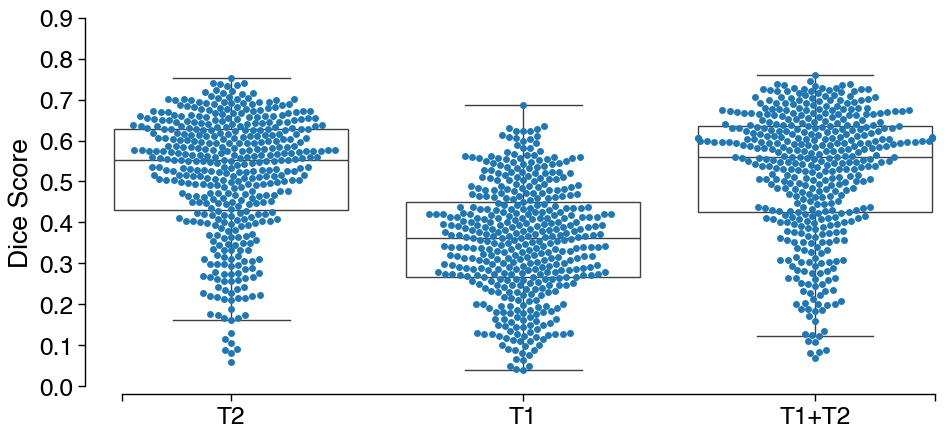

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

t2_only_df['modality'] = 'T2'
t1_only_df['modality'] = 'T1'
t1t2_df['modality'] = 'T1+T2'

concat_df = pd.concat([t2_only_df, t1_only_df, t1t2_df])

plt.figure(figsize=(11, 5))
sns.set_context("paper", font_scale=2)

ax = sns.boxplot(x="modality", y="dice", data=concat_df,
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False)#, whiskerprops={'linewidth':0})

ax = sns.swarmplot(x='modality', y='dice', data=concat_df, color="C0",
                   size=5, ax=ax)


ax = plt.gca()

modalities = concat_df['modality'].unique()
for modality in modalities:
    modality_data = concat_df[concat_df['modality'] == modality]['dice']
    mean = modality_data.mean()
    std = modality_data.std()
    print(f"{modality}: mean: {mean} +/- {std} sd")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-0.5, 2.42])
ax.set_ylim([-0.02, 0.92])
ax.set_xticks([-0.375] + ax.get_xticks() + [2.41])
tl = ax.get_xticklabels()
tl[0] = ""
tl[-1] = ""
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xticklabels(tl)
ax.spines['bottom'].set_bounds(-0.375, 2.41)
ax.spines['left'].set_bounds(0, 0.9)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.ylabel('Dice Score')
plt.xlabel('')
# plt.ylim(0, 0.9)

In [5]:
mm = pd.merge(t2_only_df, t1t2_df, on="sub_id")

In [6]:
import scipy.stats as sps

In [7]:
sps.ttest_rel(mm["dice_x"], mm["dice_y"])

TtestResult(statistic=np.float64(-1.9703325800809774), pvalue=np.float64(0.04944744763826209), df=np.int64(426))